In [1]:
using MLJ
using PrettyPrinting

┌ Info: Precompiling MLJ [add582a8-e3ab-11e8-2d5e-e98b27df1bc7]
└ @ Base loading.jl:1260
[ Info: Model metadata loaded from registry. 


In [2]:
X,y = @load_iris

((sepal_length = [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9  …  6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], sepal_width = [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1  …  3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0], petal_length = [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5  …  5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1], petal_width = [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1  …  2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]), CategoricalArrays.CategoricalValue{String,UInt32}["setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa"  …  "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica"])

In [3]:
@load DecisionTreeClassifier

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 5) @872

In [5]:
dtc = DecisionTreeClassifier()
r = range(dtc,:max_depth,lower = 1 ,upper = 5)

MLJBase.NumericRange(Int64, :max_depth, ... )

In [6]:
 tm = TunedModel(model=dtc,ranges = [r,],measure = cross_entropy)

ProbabilisticTunedModel(
    model = DecisionTreeClassifier(
            max_depth = -1,
            min_samples_leaf = 1,
            min_samples_split = 2,
            min_purity_increase = 0.0,
            n_subfeatures = 0,
            post_prune = false,
            merge_purity_threshold = 1.0,
            pdf_smoothing = 0.0,
            display_depth = 5),
    tuning = Grid(
            goal = nothing,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Int64,MLJBase.Bounded,Symbol}[NumericRange{Int64,…} @685],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPU1{Nothing}(nothing),
    acceleration_resampling =

In [7]:
?TunedModel

search: TunedModel



```
tuned_model = TunedModel(; model=nothing,
                         tuning=Grid(),
                         resampling=Holdout(),
                         measure=nothing,
                         weights=nothing,
                         repeats=1,
                         operation=predict,
                         range=nothing,
                         n=default_n(tuning, range),
                         train_best=true,
                         acceleration=default_resource(),
                         acceleration_resampling=CPU1(),
                         check_measure=true)
```

Construct a model wrapper for hyperparameter optimization of a supervised learner.

Calling `fit!(mach)` on a machine `mach=machine(tuned_model, X, y)` or `mach=machine(tuned_model, X, y, w)` will:

  * Instigate a search, over clones of `model`, with the hyperparameter mutations specified by `range`, for a model optimizing the specified `measure`, using performance evaluations carried out using the specified `tuning` strategy and `resampling` strategy.
  * Fit an internal machine, based on the optimal model `fitted_params(mach).best_model`, wrapping the optimal `model` object in *all* the provided data `X`, `y`(, `w`). Calling `predict(mach, Xnew)` then returns predictions on `Xnew` of this internal machine. The final train can be supressed by setting `train_best=false`.

The `range` objects supported depend on the `tuning` strategy specified. Query the `strategy` docstring for details. To optimize over an explicit list `v` of models of the same type, use `strategy=Explicit()` and specify `model=v[1]` and `range=v`.

The number of models searched is specified by `n`. If unspecified, then `MLJTuning.default_n(tuning, range)` is used. When `n` is increased and `fit!(mach)` called again, the old search history is re-instated and the search continues where it left off.

If `measure` supports weights (`supports_weights(measure) == true`) then any `weights` specified will be passed to the measure. If more than one `measure` is specified, then only the first is optimized (unless `strategy` is multi-objective) but the performance against every measure specified will be computed and reported in `report(mach).best_performance` and other relevant attributes of the generated report.

Specify `repeats > 1` for repeated resampling per model evaluation. See [`evaluate!`](@ref) options for details.

*Important.* If a custom `measure` is used, and the measure is a score, rather than a loss, be sure to check that `MLJ.orientation(measure) == :score` to ensure maximization of the measure, rather than minimization. Override an incorrect value with `MLJ.orientation(::typeof(measure)) = :score`.

In the case of two-parameter tuning, a Plots.jl plot of performance estimates is returned by `plot(mach)` or `heatmap(mach)`.

Once a tuning machine `mach` has bee trained as above, then `fitted_params(mach)` has these keys/values: key                 | value ––––––––––|––––––––––––––––––––––––– `best_model`        | optimal model instance `best_fitted_params`| learned parameters of the optimal model The named tuple `report(mach)` includes these keys/values: key                 | value ––––––––––|––––––––––––––––––––––––– `best_model`        | optimal model instance `best_result`       | corresponding "result" entry in the history `best_report`       | report generated by fitting the optimal model `history`           | tuning strategy-specific history of all evaluations plus others specific to the `tuning` strategy, such as `history=...`.

### Summary of key-word arguments

  * `model`: `Supervised` model prototype that is cloned and mutated to generate models for evaluation
  * `tuning=Grid()`: tuning strategy to be applied (eg, `RandomSearch()`)
  * `resampling=Holdout()`: resampling strategy (eg, `Holdout()`, `CV()`), `StratifiedCV()`) to be applied in performance evaluations
  * `measure`: measure or measures to be applied in performance evaluations; only the first used in optimization (unless the strategy is multi-objective) but all reported to the history
  * `weights`: sample weights to be passed the measure(s) in performance evaluations, if supported.
  * `repeats=1`: for generating train/test sets multiple times in resampling; see [`evaluate!`](@ref) for details
  * `operation=predict`: operation to be applied to each fitted model; usually `predict` but `predict_mean`, `predict_median` or `predict_mode` can be used for `Probabilistic` models, if the specified measures are `Deterministic`
  * `range`: range object; tuning strategy documentation describes supported types
  * `n`: number of iterations (ie, models to be evaluated); set by tuning strategy if left unspecified
  * `train_best=true`: whether to train the optimal model
  * `acceleration=default_resource()`: mode of parallelization for tuning strategies that support this
  * `acceleration_resampling=CPU1()`: mode of parallelization for resampling
  * `check_measure`: whether to check `measure` is compatible with the specified `model` and `operation`)


In [8]:
 m = machine(tm,X,y)
fit!(m)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @274.
└ @ MLJBase C:\Users\Rahul\.julia\packages\MLJBase\uKzAz\src\machines.jl:319
┌ Info: Attempting to evaluate 5 models.
└ @ MLJTuning C:\Users\Rahul\.julia\packages\MLJTuning\Bbgvk\src\tuned_models.jl:494
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:14


Machine{ProbabilisticTunedModel{Grid,…}} @274 trained 1 time.
  args: 
    1:	Source @280 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @793 ⏎ `AbstractArray{Multiclass{3},1}`


In [9]:
fitted_params(m).best_model.max_depth

1

In [10]:
tm = TunedModel(model=dtc, ranges=r, operation=predict_mode,
                measure=misclassification_rate)
m = machine(tm, X, y)
fit!(m)
fitted_params(m).best_model.max_depth

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @032.
└ @ MLJBase C:\Users\Rahul\.julia\packages\MLJBase\uKzAz\src\machines.jl:319
┌ Info: Attempting to evaluate 5 models.
└ @ MLJTuning C:\Users\Rahul\.julia\packages\MLJTuning\Bbgvk\src\tuned_models.jl:494
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:01


2

In [11]:
r = report(m)
r.best_result

(measure = [misclassification_rate],
 measurement = [0.2],)

In [12]:
using PyPlot

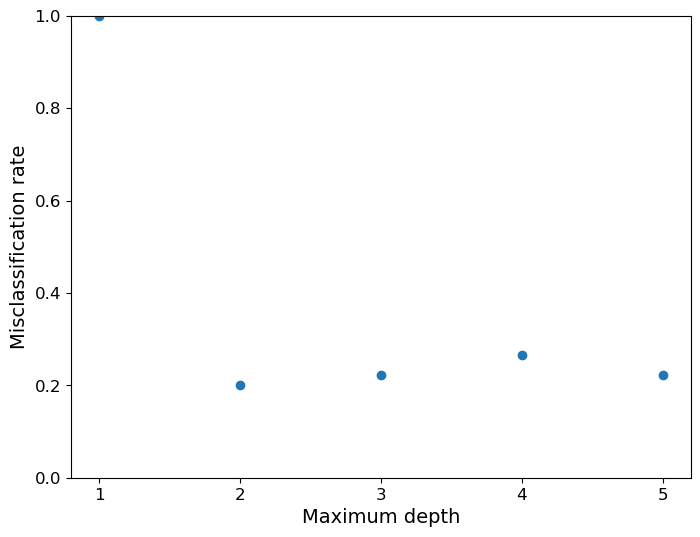

(0.0, 1.0)

In [13]:
figure(figsize=(8,6))
res = r.plotting # contains all you need for plotting
plot(res.parameter_values, res.measurements, ls="none", marker="o")

xticks(1:5, fontsize=12)
yticks(fontsize=12)
xlabel("Maximum depth", fontsize=14)
ylabel("Misclassification rate", fontsize=14)
ylim([0, 1])